In [46]:
import numpy as np
import inspect
import matplotlib.pyplot as plt
from meshGrid import mesh_grid_visual

class AdaLineGD:
    '''
    Simple perceptron class
    '''
    def __init__(self, n_iter = 100, lr = 0.1):
        '''
        Define constant parameters
        param n_iter: n iterations
        param lr: learning rate
        '''
        self.lr = lr
        self.n_iter = n_iter
        self.cost = []
        self.fit_called = False
    
    def fit(self, X, y):
        '''
        Fitting model.
        param X: feature array
        param y: labels
        '''
        if isinstance(X, (list, tuple)):
            X = np.array(X)
        X_bias = np.hstack((np.ones((X.shape[0], 1)), X))
        self.w = np.random.randn(X_bias.shape[1])
        self.fit_called = True
        for i in range(self.n_iter):
            output = self.activation(X_bias.dot(self.w))
            error = (y - output)
            self.w += self.lr  * X_bias.T.dot(error)
            self.cost.append((error**2).sum() / 2.0)

    
    def decision(self, X):
        '''
        Return decision values
        '''
        assert self.fit_called, 'Call "Fit" before this'
        if isinstance(X, (list, tuple)):
            X = np.array(X)
        X_bias = np.hstack((np.ones((X.shape[0], 1)), X))
        return X_bias.dot(self.w)
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        '''
        Return 1 or -1 depends on decision value
        1 => decision > 0
        -1 => decision < 0
        '''
        return np.where(self.decision(X) > 0, 1, -1)

In [40]:
from sklearn.datasets import make_blobs
X, y = make_blobs(cluster_std=1.3)
y = np.where(y == 0, -1, 1)

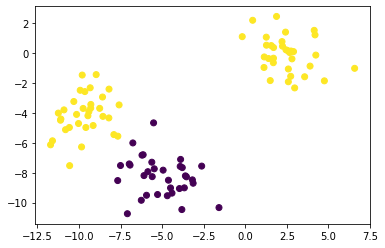

In [41]:
plt.scatter(X[:,0], X[:,1], c=y)

In [70]:
Ada = AdaLineGD(100, 0.0001)

In [71]:
Ada.fit(X, y)

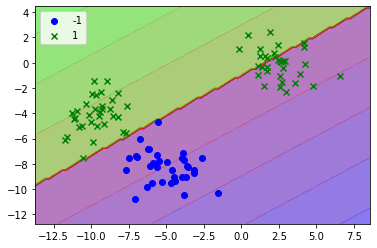

In [72]:
mesh_grid_visual(X, y, Ada)

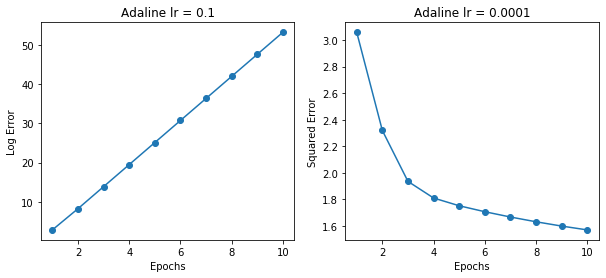

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,4))
ada1 = AdaLineGD(10, 0.1)
ada1.fit(X, y)
ax[0].plot(range(1, len(ada1.cost)+1), np.log10(ada1.cost), marker = 'o')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Log Error")
ax[0].set_title("Adaline lr = 0.1")

ada2 = AdaLineGD(10, 0.0001)
ada2.fit(X, y)
ax[1].plot(range(1, len(ada2.cost)+1), np.log10(ada2.cost), marker = 'o')
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Squared Error")
ax[1].set_title("Adaline lr = 0.0001")
plt.show()


In [73]:
from sklearn.preprocessing import StandardScaler

In [76]:
X_scaled = StandardScaler().fit_transform(X)

In [92]:
ada3 = AdaLineGD(15, 0.01)

In [93]:
ada3.fit(X_scaled, y)

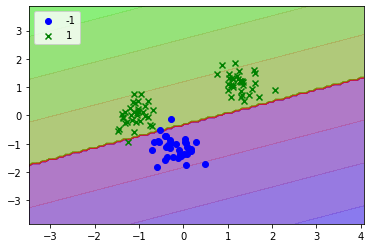

In [94]:
mesh_grid_visual(X_scaled, y, ada3)